In [1]:
import gensim, logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(u'grayscale')
plt.style.available
%matplotlib inline  


## word2vec 기본

---
### 샘플 문자 생성 및 학습

In [56]:
sentences = [['baseball','lg'], [ 'baseball','nc'], ['ss','baseball']]
# vector dimention : 2
model = gensim.models.Word2Vec(sentences, min_count=1,size=2, window=2)

In [57]:
## 학습된 단어의 vector값 접근
model['lg']

array([ 0.01487322,  0.19446637], dtype=float32)

In [58]:
## 학습된 백터들
model.index2word

['lg', 'baseball', 'nc', 'ss']

In [59]:
for word in model.index2word:
    print( word, model[word] )

lg [ 0.01487322  0.19446637]
baseball [-0.23687515  0.22054049]
nc [ 0.0451815  -0.11396711]
ss [ 0.09470624  0.16320889]


## 화면에 출력

In [44]:
def drawPlot(v, x, y):
    v.plot(kind='scatter', x=x,y=y, figsize=(5,5))
    for idx, pos in v.iterrows():
        plt.text(pos[x], pos[y], idx )
       
def draw3DPlot(v, x, y, z):
    fig = plt.figure(figsize=(8,8))
    threedee = fig.gca(projection='3d')
    threedee.scatter(v[x], v[y],v[z] )
    for idx, pos in v.iterrows():
        threedee.text(pos[x], pos[y],pos[z],  idx )

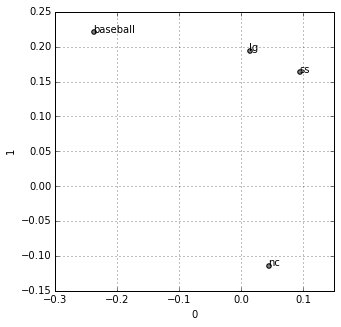

In [45]:
v = pd.DataFrame(model.syn0, index=model.vocab)
drawPlot(v, 0, 1)

In [46]:
sentences = [['lg', 'baseball'], ['nc', 'baseball'], ['ss','baseball'], 
             ['lg','player','lee','good'],[ 'lg','player','ckm'],[ 'lg','player','jeehwan'], 
             ['ss','player','nbr'],[ 'ss','player','ajm'],[ 'ss','player','chw']             ]
# vector dimention : 2
model = gensim.models.Word2Vec(sentences, min_count=1,size=3, window=2)

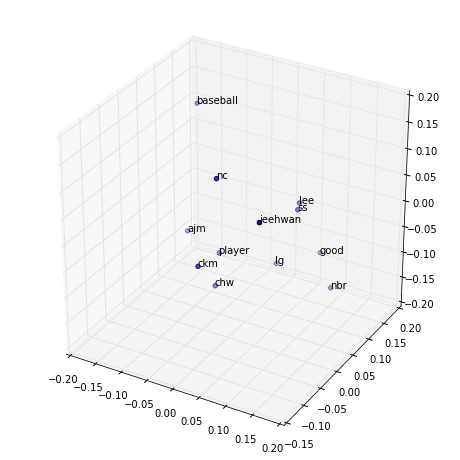

In [47]:
v = pd.DataFrame(model.syn0, index=model.vocab)
draw3DPlot(v, 0, 1, 2)
#drawPlot(v, 0, 1)

---
## 학습된 모델 사용 
* 구글 뉴스로 트레이닝된 모델 사용 ( 100B words, 3M vector words, 300-Dimentions ) 
 * https://code.google.com/p/word2vec/#Pre-trained_word_and_phrase_vectors

In [52]:
gn_model = gensim.models.Word2Vec.load_word2vec_format('/Users/goodvc/data/fastcampus/week4/resource/GoogleNews-vectors-negative300.bin', binary=True)

In [54]:
gn_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7118192315101624)]

In [60]:
gn_model.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

In [62]:
gn_model.similarity('woman', 'man')

0.76640122344103201

In [78]:
gn_model['computer'][:10]

array([ 0.04081374, -0.07643302,  0.04675029,  0.08051439, -0.03469168,
        0.08236956, -0.0500896 ,  0.03153789,  0.07680405,  0.01818067], dtype=float32)

---
## 모델의 저장과 불러오기 
### gensim standard format SAVE/LOAD

In [65]:
model.save('./resource/test.model')

In [76]:
test_model = gensim.models.Word2Vec.load('./resource/test.model')
test_model['lg']

array([ 0.01487322,  0.19446637], dtype=float32)

### original word2vec( written c ) format SAVE/LOAD

In [72]:
model.save_word2vec_format('./resource/test.bin', binary=True)

In [74]:
test_model = gensim.models.Word2Vec.load_word2vec_format('./resource/test.bin', binary=True)
test_model['lg']

array([ 0.07625949,  0.99708796], dtype=float32)